## 6. Funções de múltiplas variáveis

Uma função de múltiplas variáveis é uma relação matemática que associa a cada elemento de um subconjunto de $R^n$ um elemento de $R^m$, $n \geq 1$. Se $m=1$ tem-se funções escalares de múltiplas variáveis. Se $m>1$ tem-se funções vetoriais de múltiplas variáveis, ou seja, campos vetoriais.

Essas funções ocorrem com frequência em situações práticas. Por exemplo, o volume de um cilindro circular depende do raio da base e da altura. O custo de um produto depende do custo de cada material utilizado em sua produção, além do custo da fabricação e outros. A temperatura na superfície da terra depende da posição geográfica, data, hora, altitude, e outras variáveis. Uma reação química depende das quantidades dos elementos, temperatura e pressão. A velocidade e direção do vento depende do dia, hora e local, condições climáticas, etc. 

Em ciências e engenharia é comum tratarmos com funções de múltiplas variáveis em um domínio bidimensional ou tridimensional, podendo variar com o tempo ou não. É comum nos referirmos às funções de múltiplas variáveis, especialmente àquelas cujas variáveis dependem do tempo, como funções vetoriais. Vamos tomar alguns casos como exemplos.

#### Função de duas variáveis reais a uma variável real

É uma relação $f:R^2 \rightarrow R$ que associa cada elemnto $(x,y)$
do domínio $D \in R^2$ a um único elemento de $z \in R$ Podemos escrever 

$$z = f(x,y)$$

assim, os elementos pertencentes a essa função são ponto $(x,y,z)$ do $R^3$. A representação gráfica dessa função pode ser tridimensional, pontos no espaço, ou bidimensional usando, por exemplo, curvas de nível ou mapa de cores. O conjunto imagem pode ser interpretado como um campo escalar.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

**Exemplo 1**
A distância de um ponto $(x,y)$ do plano cartesiano até o ponto $(2,1)$ é dada pela função de duas variáveis $d(x,y)=\sqrt{(x-2)^2+(y-1)^2}$. Assim, o ponto $(5,3)$ dista do do ponto $(2,1)$ em

$$d(5,3)=\sqrt{(5-2)^2 + (3-1)^2} = \sqrt{13}$$

Podemos pensar em $d(5,3)=\sqrt{13}$ como a cota, ou coordenada $z$ do ponto $(5,3,\sqrt{13})$ no espaço $R^3$. Como $d(x,y)$ é uma função contínua, se tomarmos uma região retangular do $R^2$ a imagem de para essa regiçao será uma superfície do $R^3$.

A seguir vamos ver um exemplo de como criar um conjunto de pontos em uma grade regular do $R^2$, obter os valores da função e representar graficamente de trÊs modos diferentes.

In [38]:
#cria a malha
x = np.linspace(0, 6, 21)
y = np.linspace(0, 6, 21)
xi, yi = np.meshgrid(x, y)

In [39]:
# define a função
d = lambda x,y: np.sqrt((x-2)**2+(y-1)**2)

In [40]:
#Testando para (5,3)
d(5,3)

3.605551275463989

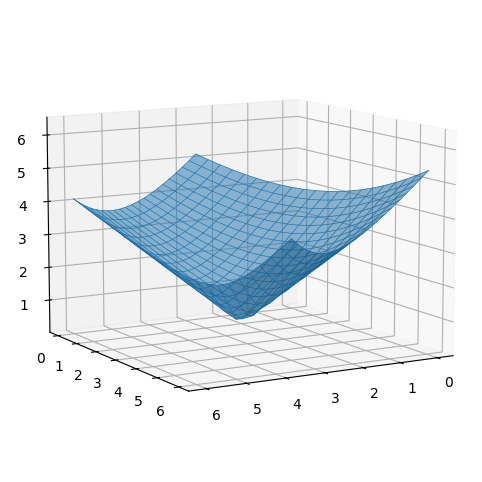

In [41]:
# cria a figura
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(projection='3d')

# plota superficie
ax.plot_surface(xi, yi, d(xi,yi), alpha=0.5)
ax.plot_wireframe(xi, yi, d(xi,yi), lw=0.5)
ax.view_init(10, 60)
plt.show()

In [42]:
# plota superficie
ax.plot_surface(xi, yi, d(xi,yi), alpha=0.5)
ax.plot_wireframe(xi, yi, d(xi,yi), lw=0.5)
ax.view_init(10, 60)
plt.show()

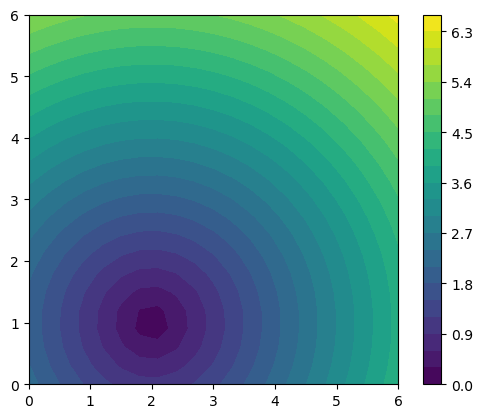

In [43]:
# plota mapa de cores 
ax = fig.add_subplot()
plt.contourf(x, y, d(xi,yi), 20)
plt.gca().set_aspect('equal')
plt.colorbar()
plt.show()

Opções de mapas de cores em: https://matplotlib.org/stable/tutorials/colors/colormaps.html

Customizar a barra de cores: 
https://matplotlib.org/stable/tutorials/colors/colorbar_only.html

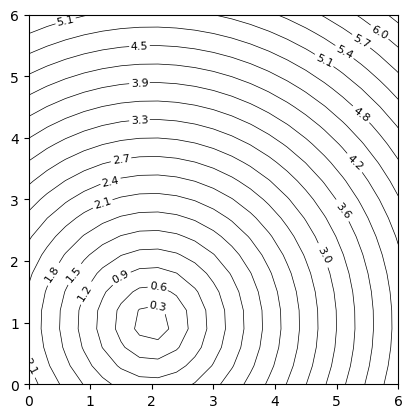

In [44]:
# plota curvas de nível
c = plt.contour(x, y, d(xi,yi),20, linewidths=0.5, colors='k')
plt.clabel(c, inline=2, fontsize=8)
plt.gca().set_aspect('equal')

plt.show()

**Exemplo 2:**
Nesse exemplo vamos representar graficamente a função $z=f(x,y)=x^2+2y^2$. Para isso vamos gerar um conjunto de 21x21 pontos distribuidos em uma malha tal que $-10\leq x \leq10$ e $-10\leq y \leq10$. No primeiro gráfico vamos representar cada ponto calculado e também 
representar a superfície, que é o gráfico dessa função contínua. No segundo gráfico vamos representar o campo escalar por meio de curvas de nível.

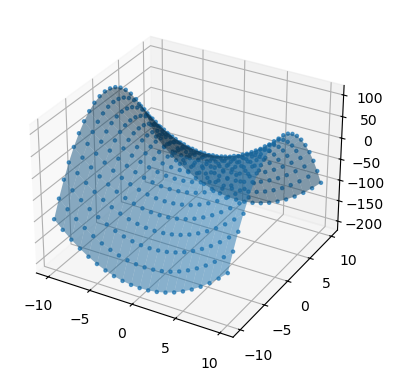

In [45]:
#cria a malha
x = np.linspace(-10, 10, 21)
y = np.linspace(-10, 10, 21)
x, y = np.meshgrid(x, y)

# define a função
f = lambda x,y: x**2 - 2*y**2
z = f(x,y)

#cria a figura
fig = plt.figure(figsize=(10,10))

# plota
ax1 = fig.add_subplot(211,projection="3d")
ax1.scatter3D(x, y, z, alpha=0.7, marker='.')
ax1.plot_surface(x, y, z, alpha=0.5)
plt.show()

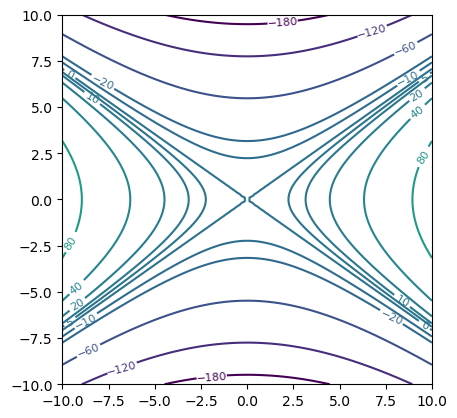

In [46]:
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
x, y = np.meshgrid(x, y)
# define a função
f = lambda x,y: x**2 - 2*y**2
z = f(x,y)

c = plt.contour(x, y, z, [-180,-120,-60,-20,-10,0,5,10,20,40,80,160,300])
plt.clabel(c, inline=2, fontsize=8)
plt.gca().set_aspect('equal')
plt.show()

**Exemplo 3:** Neste exemplo vamos visualizar uma matriz que contém dados em uma grade regular bidimensional de 16x16. Podemos pensar nesses dados como a temperatura de uma chapa metáliza aquecida por duas contes de calor. Nesse caso, o valor da temperatura depende da coordenada $(x,y)$. Dessa vez vamos combinar escala de cinzas com curvas de nível.

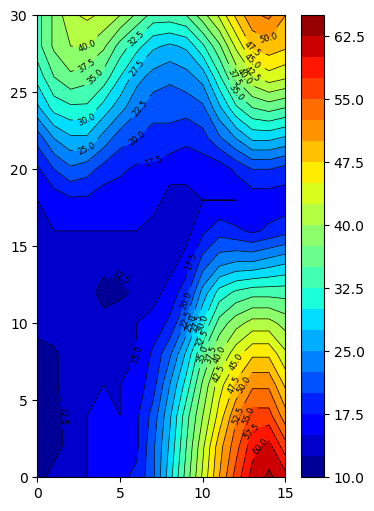

In [50]:
T = np.array([
[12,13,14,15,16,17,18,22,29,36,43,50,56,61,63,61],
[12,12,13,15,16,16,17,22,28,35,42,49,54,59,61,56],
[11,12,13,15,16,15,17,21,27,34,40,46,52,56,56,51],
[11,12,14,15,15,15,16,19,25,31,38,44,48,52,52,47],
[12,12,14,15,14,14,15,18,22,28,35,40,44,47,47,43],
[13,14,15,13,13,14,15,16,18,23,30,36,39,41,41,39],
[14,15,14,13,12,12,13,14,16,19,26,31,33,34,34,34],
[14,15,14,14,13,13,13,13,14,16,21,24,25,25,26,27],
[15,15,15,15,15,15,15,14,13,14,17,19,18,17,18,19],
[15,16,17,17,16,16,16,16,14,14,15,15,15,16,16,16],
[17,20,22,21,19,18,17,17,16,16,16,16,18,20,20,19],
[21,25,27,27,24,21,20,19,19,18,19,22,25,28,28,27],
[27,31,32,32,29,26,23,21,21,21,22,27,32,35,36,35],
[31,35,37,36,34,30,26,24,23,24,26,32,38,42,44,43],
[34,38,40,40,38,34,31,28,27,28,32,37,43,48,49,48],
[34,38,42,43,42,40,37,34,34,35,39,43,48,52,53,50]], 
dtype = float)

x = np.linspace(0, 15, 16)
y = np.linspace(0, 30, 16)
xi, yi = np.meshgrid(x, y)

fig = plt.figure(figsize=(4,6))

ax = fig.add_subplot(111)
plt.contourf(x, y, T, 20,cmap ='jet')
plt.colorbar()
c = plt.contour(x, y, T,20, linewidths=0.5,colors='k')
plt.clabel(c, inline=2, fontsize=6)
plt.show()


O módulo `interpolate` da biblioteca SciPy possui funções para interpolar dados multidimensionais, o que permite, por exemplo, obter um conjunto de dados maiores em uma  malha mais densa, como é exemploficado abaixo:

In [51]:
from scipy import interpolate
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.griddata.html

In [52]:
# reorganiza os pontos para o formato de entrada na função 
x_pts = np.ravel(xi)
y_pts = np.ravel(yi)
points = np.vstack((x_pts, y_pts)).T
#points.shape

In [53]:
# cria uma malha 61x61
grid_x, grid_y = np.mgrid[0:15:61j, 0:30:61j]
Tinterp = interpolate.griddata(points, np.ravel(T.T), (grid_x, grid_y), method='cubic')
#Tinterp.shape

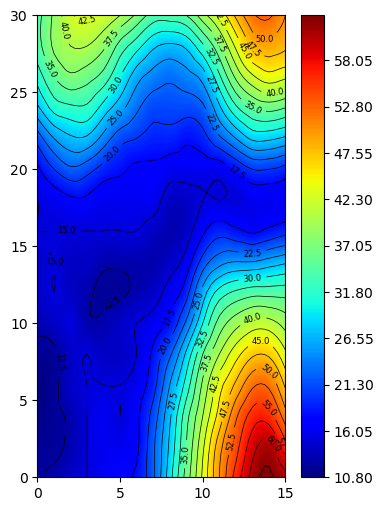

In [55]:
# plota
fig = plt.figure(figsize=(4,6))
x = np.linspace(0, 15, 61)
y = np.linspace(0, 30, 61)

ax = fig.add_subplot(111)
plt.contourf(x, y, Tinterp, 520, cmap='jet')
plt.colorbar()
c = plt.contour(x, y, Tinterp,20, linewidths=0.5,colors='k')
plt.clabel(c, inline=2, fontsize=6)
plt.show()

**Exercício 1:** (Adaptado de [Stewart, 2022](https://integrada.minhabiblioteca.com.br/reader/books/9786555584103/pageid/350)) Plote a superfície e curvas de nível para as funções

(a) $\quad f(x, y)=\left(x^2+3 y^2\right) e^{-x^2 y^2}$

(b) $\quad f(x, y)=\operatorname{sen} x+\operatorname{sen} y$

(c) $\quad f(x, y)=\frac{\operatorname{sen} x \operatorname{sen} y}{x y}$

(d) $\quad f(x, y)=-x y e^{-x^2 y^2}$

(e) $\quad f(x, y)=\frac{-3 y}{x^2+y^2+1}$

#### Função de três variáveis reais a uma variável real

É uma relação $f:R^3 \rightarrow R$ em que o domínio é  um subconjunto do espaço $xyz$. Podemos escrever 

$$w = f(x,y,z)$$

assim, os elementos pertencentes a essa função são ponto $(x,y,z,w)$ do $R^4$. Nesse caso não é fácil representar graficamente essa função, cada ponto no espaço assume um valor como imagem. Uma possível representação seria utilizar superfícies de nível, outras abordagens podem envolver planos de corte mapa de cores em um conjunto de pontos e outras técnicas de visualização de dados.

**Exemplo 4:**
Vamos considerar agora a distância de um ponto $(x,y,z)$ do espaço cartesiano até o ponto $(3,2,1)$. Então, temos a função de três variáveis $d(x,y,z)=\sqrt{(x-3)^2+(y-2)^2+(z-1)^2}$. Assim, o ponto $(4,2,3)$ dista do do ponto $(3,2,1)$ em

$$d(4,3,2)=\sqrt{(3-4)^2 + (2-2)^2 + (3-1)^2} = \sqrt{2}$$

Podemos pensar em $d(4,3,2)=\sqrt{2}$ como a cota, ou coordenada $z$ do ponto $(4,3,\sqrt{2})$ no espaço $R^3$. Como $d(x,y)$ é uma função contínua, se tomarmos um volume do $R^3$ na forma de um paralelepípedo, a imagem será um conjunto do $R^4$.

A seguir vamos ver um exemplo de como criar um conjunto de pontos em uma grade regular do $R^3$, obter os valores da função e representar graficamente.

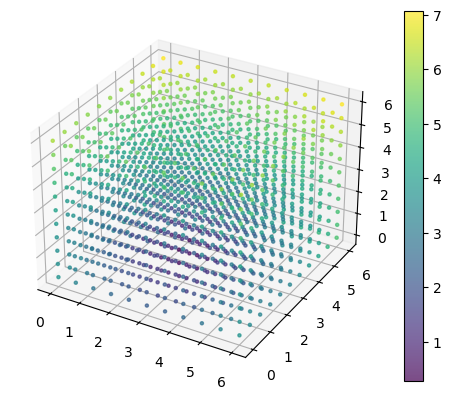

In [57]:
z = np.linspace(0, 6, 11)
x = np.linspace(0, 6, 11)
y = np.linspace(0, 6, 11)
xi, yi, zi = np.meshgrid(x, y, z)

d = lambda x,y,z: np.sqrt((x-3)**2+\
                          (y-2)**2+\
                          (z-1)**2)
# Creating figure
fig = plt.figure()
ax = plt.axes(projection="3d")

# Creating plot
sc = ax.scatter3D(xi, yi, zi, 
                  c=d(xi,yi,zi), 
                  alpha=0.7, marker='.')
plt.colorbar(sc)
plt.show()

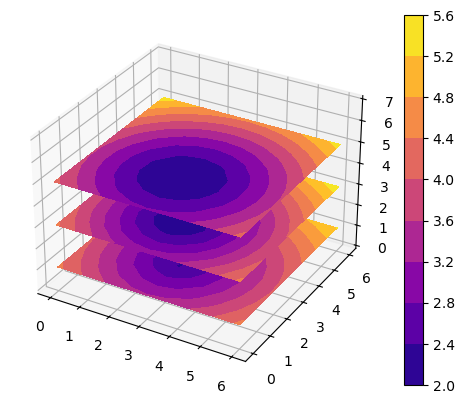

In [58]:
w = d(xi,yi,zi)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

for z in [1,3,5]:
    c = ax.contourf(xi[:,:,z], yi[:,:,z], 
                    w[:,:,z], 10, 
                    zdir='z', offset=z,
                   cmap='plasma')
plt.colorbar(c)
ax.set_zlim((0.,7))
plt.show()

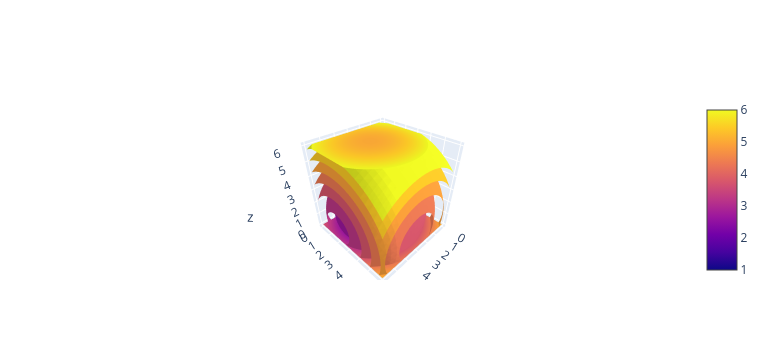

In [59]:
import plotly.graph_objects as go
import numpy as np

x,y,z = np.mgrid[0:6:21j, 0:6:21j, 0:6:21j]

# ellipsoid
values = np.sqrt((x-3)**2+\
                 (y-2)**2+\
                 (z-1)**2)

fig = go.Figure(data=go.Isosurface(
    x=x.flatten(),
    y=y.flatten(),
    z=z.flatten(),
    value=values.flatten(),
    #opacity=0.9,
    isomin=1,
    isomax=6,
    surface_count=10,
    colorbar_nticks=10,
    caps=dict(x_show=False, y_show=False)
    ))
fig.show()

**Atividade 2:** Represente graficamente as seguintes funções:

(a) $\quad f(x, y, z)= x^2y \cos(z)$

(b) $\quad f(x, y, z)= x^2+xyz+z^4$

(c) $\quad f(x, y, z)=\sqrt{4-x^2}+\sqrt{9-y^2}+\sqrt{1-z^2}$

(d) $\quad f(x, y, z)=\ln \left(16-4 x^2-4 y^2-z^2\right)$

#### Função vetorial de uma variável no espaço

É uma relação $f:R \rightarrow R^3$ em que o domínio é um subconjunto de $R$. Podemos escrever 

$$\vec v = f(t)$$

assim, os elementos pertencentes a essa função são vetores $\vec v=(x(t), y(t), z(t))$ do $R^3$. O gráfico dessa função é uma curva paramétrica no espaço, cujos pontos dependem do parâmetro $t \in R$. 

**Exemplo 5:**
Nesse exemplo vamos representar graficamente a função 

$$\vec v = f(t) = \left (t^2sen(t), tcos(t), \sqrt{t} \right)$$

com $0 \leq t \leq8 \pi$.



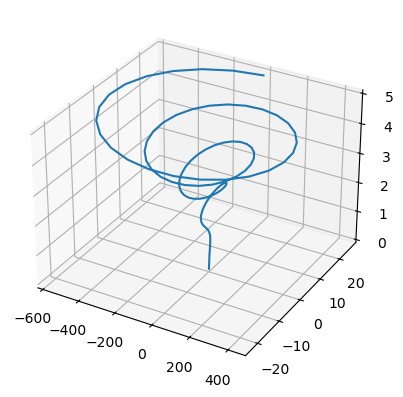

In [15]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Prepare arrays x, y, z
t = np.linspace(0, 8*np.pi, 100)
z = np.sqrt(t)
x = t**2 * np.sin(t)
y = t*np.cos(t)
z = np.sqrt(t)
ax.plot(x, y, z)
plt.show()

#### Campo vetorial bibimensional

É uma relação $f:R^2 \rightarrow R^2$ em que o domínio é um subconjunto de $R^2$ e a imagem é um conjunto de vetores no plano. OU seja, uma função que associa a cada ponto $(x,y)$ do domínio, um único vetor $(u,v)$. Podemos escrever 

$$f(x,y)=(u,v)$$

assim, os elementos pertencentes a essa função são vetores do $R^2$. A represntação gráfica dessa função é um campo vetorial bidiemnsional.

**Exemplo 6:**
Nesse exemplo vamos representar graficamente o campo de vetores dados pela função $$f(x,y)=\left(\frac{-y^2}{x^4+y^4},\frac{x}{\sqrt{x^2+y^2}} \right)$$

usando uma malha de 10x10 pontos, com $-5 \leq x \leq 5$ e $-5 \leq y \leq 5$.

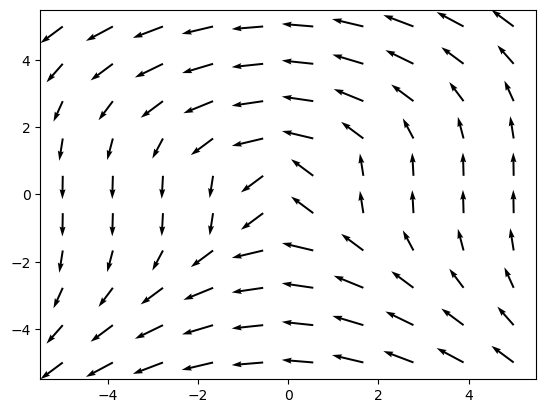

In [77]:
x = np.linspace(-5,5,10)
y = np.linspace(-5,5,10)
xi,yi = np.meshgrid(x,y)

u = -yi**2/np.sqrt(xi**4 + yi**4)
v = xi/np.sqrt(xi**2 + yi**2)

#plt.streamplot(xi,yi,u,v)
plt.quiver(xi, yi, u, v,
           scale_units='xy', angles='xy', width=0.004)      #
plt.show()

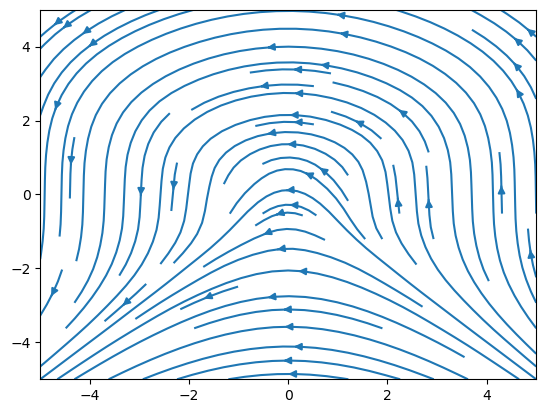

In [78]:
plt.streamplot(xi,yi,u,v)
plt.show()

#### Campo vetorial tridimensional

É uma relação $f:R^3 \rightarrow R^3$ em que o domínio é um subconjunto de $R^3$ e a imagem é um conjunto de vetores no espaço. Ou seja, uma função que associa a cada ponto $(x,y,z)$ do domínio, um único vetor $(u,v,w)$. Podemos escrever 

$$f(x,y,z)=(u,v,w)$$

assim, os elementos pertencentes a essa função são vetores do $R^3$. A represntação gráfica dessa função é um campo vetorial tridiemnsional.

**Exemplo 7:**
Nesse exemplo vamos representar graficamente o campo de vetores dados pela função $$f(x,y,z)=\left( sen(x)cos(yz),-yz, cos(x)sen(z) \right)$$

usando uma malha de 10x10 pontos, com $-5 \leq x \leq 5$ e $-5 \leq y \leq 5$.

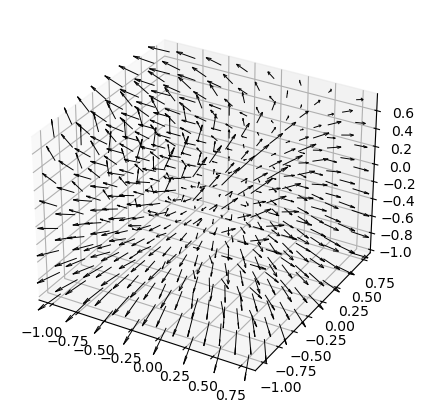

In [17]:
#matplotlib widget
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(projection='3d')

x,y,z = np.meshgrid(np.arange(-1, 1, 0.25),
                    np.arange(-1, 1, 0.25),
                    np.arange(-1, 1, 0.25))

u = np.sin(x) * np.cos(y*z)
v = -y*z
w = np.cos(x) * np.sin(z)

ax.quiver(x, y, z, u, v, w, 
          length=0.2, linewidths= 0.7,
          color = 'black')

plt.show()

### Mais alguns exemplos

**Exemplo: (esfera)** A distância $\left|P_1 P_2\right|$ entre os pontos $P_1\left(x_1, y_1, z_1\right)$ e $P_2\left(x_2, y_2, z_2\right)$ é

$$
\left|P_1 P_2\right|=\sqrt{\left(x_2-x_1\right)^2+\left(y_2-y_1\right)^2+\left(z_2-z_1\right)^2}
$$

Uma esfera de raio $r$ e centro em $C(h, k, l)$ é definida como o conjunto de todos os pontos $P(x, y, z)$ cuja distância a $C$ é igual a $r$. Assim, a equação de uma esfera com centro $C(h, k, l)$ e raio $r$ é

$$
(x-h)^2+(y-k)^2+(z-l)^2=r^2
$$

Em particular, se o centro é a origem $O$, então a equação da esfera é

$$
x^2+y^2+z^2=r^2
$$

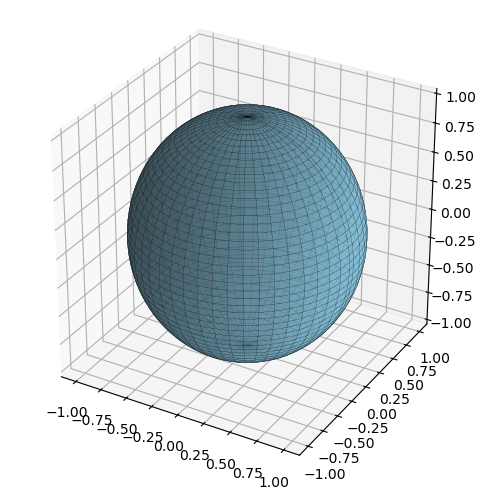

In [18]:
# Cria as coordenadas esféricas (theta: ângulo azimutal, phi: ângulo polar)
theta = np.linspace(0, 2 * np.pi, 100)   # ângulo ao redor do eixo z
phi = np.linspace(0, np.pi, 100)         # ângulo do polo norte ao sul

# Gera uma malha de coordenadas (grid)
theta, phi = np.meshgrid(theta, phi)

# Raio da esfera
r = 1

# Conversão para coordenadas cartesianas
x = r * np.sin(phi) * np.cos(theta)
y = r * np.sin(phi) * np.sin(theta)
z = r * np.cos(phi)

# Cria a figura e o gráfico 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plota a superfície
ax.plot_surface(x, y, z, color='skyblue', edgecolor='k', alpha=0.7, lw=0.1)
ax.set_box_aspect([1,1,1])  # eixo com proporções iguais

plt.show()

**Exemplo: (Curvas de nível)**


In [19]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

In [20]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

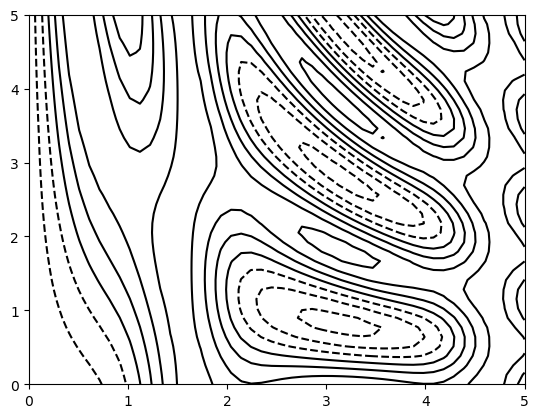

In [21]:
plt.contour(X, Y, Z, colors='black');

**Exemplo: vetor normal**

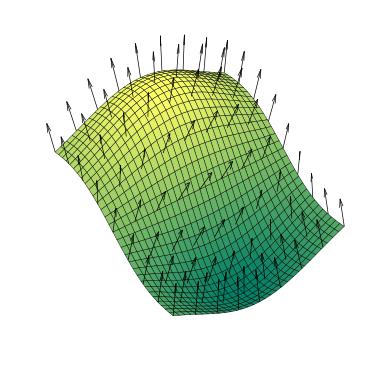

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x, y = np.mgrid[-1:1:31j, -1:1:31j]
xs, ys = np.mgrid[-1:1:9j, -1:1:9j]

z = x*np.exp(-x**2 - y**2)
zs = xs*np.exp(-xs**2 - ys**2)
u = -(1 - 2*xs**2)*np.exp(-xs**2 - ys**2)
v = 2*ys*zs
w = np.ones_like(xs)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(azim=145, elev=45)
ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap="summer", lw=0.3,
                edgecolors="k")
ax.quiver(xs, ys, zs, u, v, w, colors='k', pivot='tail', length=0.2, lw=0.5)
plt.axis("off")
plt.savefig("Surface normals.svg", bbox_inches="tight", transparent=True)
plt.show()

**Exercícios:**

Plote as seguintes funções (Thomas, v.2, p.214-216):

a) $z = sen(x) + 2sen(y)$

b) $z = (4x^2+y^2)e^{-x^2-y^2}$

c) $z = xye^{-y^2}$

d) $z = cos(x)cos(y)e^{-\sqrt{x^2+y^2}/4}$

e) $w = 4ln(x^2+y^2-3z^2)$

f) $w = x^2+sen(y)+e^{1/z}$

g) $w = sen(x/2)-cos(x)\sqrt{x^2+z^2}$

h) $v(t) = \left(sen(3t)cos(t), sen(3t)sen(t), t \right)$

i) $v(t) = \left(cos(t), sen(t), sen(2t) \right)$

j) $v(t) = \left(4+sen(20t)cos(t), 4+sen(20t)sen(t), coz(20t) \right)$

k) $u(x,y) =  \left( -\frac{x}{(x^2+y^2)^{3/2}}, -\frac{y}{(x^2+y^2)^{3/2}}    \right)$

l) $u(x,y,z) =  \left( -\frac{2x}{(x^2+y^2)}, -\frac{2y}{(x^2+y^2)}, e^z    \right)$